In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Dataset .csv")
df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314


In [3]:
df = df.dropna()

In [4]:
df.shape

(9542, 21)

In [5]:
df = df[df['Aggregate rating'] !=0]

In [6]:
df.shape

(7394, 21)

In [11]:
# Consider only the first cuisine type in case multiple cuisines are listed
df['Primary Cuisine'] = df['Cuisines'].apply(lambda x: x.split(',')[0] if ',' in str(x) else x)

cuisine_ratings = df.groupby("Primary Cuisine")["Aggregate rating"].mean().sort_values(ascending = False)

cuisine_ratings.head(10)

,Aggregate rating
Primary Cuisine,
Sunda,4.900000
Scottish,4.700000
Cajun,4.700000
Taiwanese,4.650000
Filipino,4.616667
Persian,4.600000
Ramen,4.600000
World Cuisine,4.500000
Argentine,4.500000


<ipython-input-12-bd85eff73215>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_ratings.index[:15], y=cuisine_ratings.values[:15], palette="viridis")


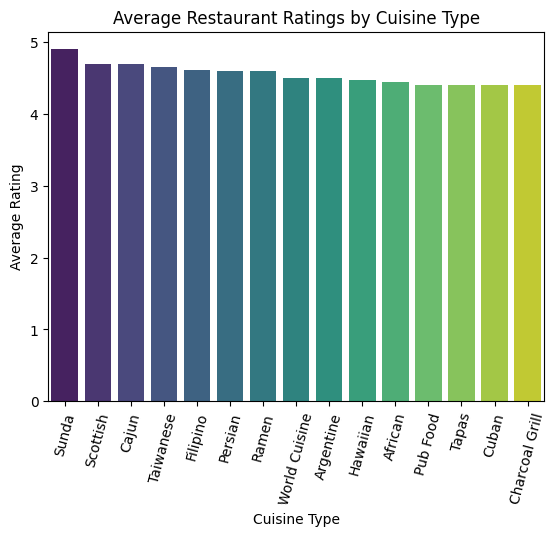

In [12]:
sns.barplot(x=cuisine_ratings.index[:15], y=cuisine_ratings.values[:15], palette="viridis")

plt.xticks(rotation=75)
plt.xlabel("Cuisine Type")
plt.ylabel("Average Rating")
plt.title("Average Restaurant Ratings by Cuisine Type")
plt.show()

In [14]:
cuisine_votes = df.groupby("Primary Cuisine")["Votes"].mean().sort_values(ascending = False)

In [15]:
cuisine_votes.head(10)

,Votes
Primary Cuisine,
Pub Food,1998.000000
Sunda,1838.000000
Cuban,1746.000000
Cajun,1412.000000
Peranakan,1159.000000
Hawaiian,1149.800000
Parsi,1027.333333
Modern Indian,1025.000000
Portuguese,1024.750000


Sunda cuisine tend to recieve highest rating